# Modules instalation

In [ ]:
!conda install -yc conda-forge ipython-sql

In [ ]:
!conda update -n base -c conda-forge conda

In [ ]:
!conda --version

# Load database

In [19]:
%%capture
%load_ext sql
%sql sqlite:///factbook2.db

# Overview of the Data

In [21]:
%%sql
SELECT *
  FROM sqlite_master
 WHERE type='table';

 * sqlite:///factbook2.db
Done.


type,name,tbl_name,rootpage,sql
table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, ""code"" varchar(255) NOT NULL, ""name"" varchar(255) NOT NULL, ""area"" integer, ""area_land"" integer, ""area_water"" integer, ""population"" integer, ""population_growth"" float, ""birth_rate"" float, ""death_rate"" float, ""migration_rate"" float)"
table,cities,cities,2,"CREATE TABLE cities ( id integer primary key, name text, population integer, capital bool, facts_id text, foreign key(facts_id) references facts(id) )"


In [ ]:
%%sql
SELECT *
  FROM facts
 LIMIT 5;

**In this project, we'll work with data from the CIA World Factbook, a compendium of statistics about all of the countries on Earth. The Factbook contains demographic information like the following:**



Here are the descriptions for some of the columns:
- name — the name of the country.
- area — the total land and sea area of the country.
- population — the country's population.
- population_growth— the country's population growth as a percentage.
- birth_rate — the country's birth rate, or the number of births a year per 1,000 people.
- death_rate — the country's death rate, or the number of death a year per 1,000 people.
- area— the country's total area (both land and water).
- area_land — the country's land area in square kilometers.
- area_water — the country's water area in square kilometers.

Let's start by calculating some summary statistics and see what they tell us.


# Summary Statistics

Minimum population

In [ ]:
%%sql
SELECT MIN(population) AS min_pop,
       MAX(population) AS max_pop,
       MIN(population_growth) AS min_pop_growth,
       MAX(population_growth) max_pop_growth 
  FROM facts;



A few things are interesting in the summary statistics on the previous screen:

- There's a country with a population of 0.
- There's a country with a population of `7256490011` (or more than 7.2 billion people).


## Exploring Outliers

Countries with the minimum population.

In [17]:
%%sql
SELECT * FROM facts WHERE population = (SELECT MIN(population) AS min_pop FROM facts);

 * sqlite:///factbook2.db
Done.


id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
250,ay,Antarctica,None,280000,None,0,None,None,None,None


# Challenge: Complex Query with Joins and Subqueries

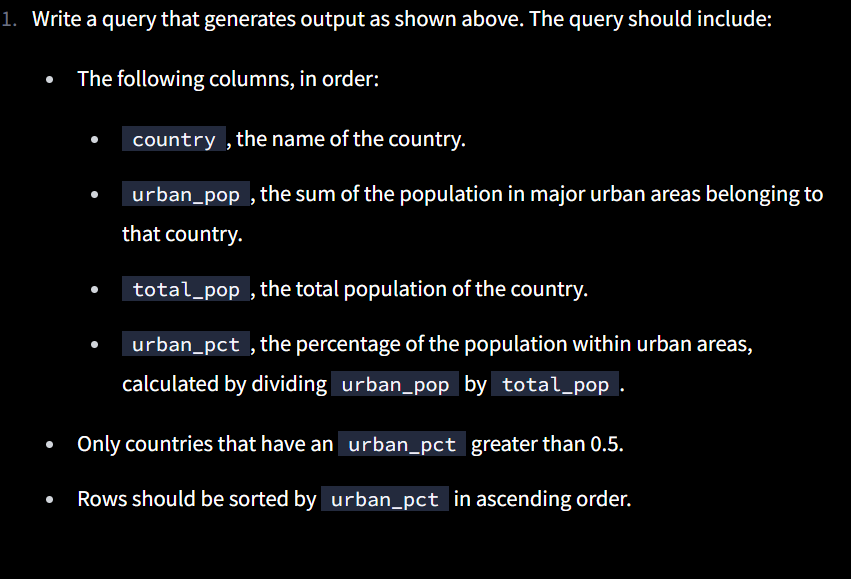

In [37]:
%%sql
SELECT * FROM facts WHERE name = 'Spain' lIMIT 5;

 * sqlite:///factbook2.db
Done.


id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
163,sp,Spain,505370,498980,6390,48146134,0.89,9.64,9.04,8.31


In [32]:
%%sql
SELECT * FROM cities lIMIT 5;

 * sqlite:///factbook2.db
Done.


id,name,population,capital,facts_id
1,Oranjestad,37000,1,216
2,Saint John'S,27000,1,6
3,Abu Dhabi,942000,1,184
4,Dubai,1978000,0,184
5,Sharjah,983000,0,184


In [31]:
%%sql
SELECT * FROM cities WHERE capital = 1 AND population > 10000000
             

 * sqlite:///factbook2.db
Done.


id,name,population,capital,facts_id
16,Buenos Aires,13528000,1,7
37,Dhaka,15391000,1,14
81,Beijing,15594000,1,37
111,Cairo,11169000,1,53
161,New Delhi,22654000,1,77
190,Tokyo,37217000,1,85
240,Mexico City,20446000,1,114
291,Manila,11862000,1,138
296,Moscow,11621000,1,143


`urban_pop` - the sum of the population in major urban areas belonging to that country.


slect sum of cities populations in cities table for each of the countries from facts

In [60]:
%%sql
SELECT f.name country,  
f.population as total_pop,
(urban_pop / CAST(f.population AS FLOAT)) urban_pct
FROM facts f

INNER JOIN (
    SELECT facts_id, SUM(population) urban_pop FROM cities GROUP BY 1
            ) c ON c.facts_id = f.id

WHERE urban_pct > 0.5
ORDER BY urban_pct ASC
 

 * sqlite:///factbook2.db
Done.


country,total_pop,urban_pct
Uruguay,3341893,0.5003152404939356
"Congo, Republic of the",4755097,0.5141850944365594
Brunei,429646,0.5609269026128487
New Caledonia,271615,0.5780240413821034
Virgin Islands,103574,0.5792959623071428
Falkland Islands (Islas Malvinas),3361,0.5950609937518596
Djibouti,828324,0.5987995035758954
Australia,22751014,0.6060828761302683
Iceland,331918,0.6206352171319423
Israel,8049314,0.6492478737939655


In [ ]:
   (
            SELECT * FROM cities 
            WHERE capital = 1 
            AND population > 10000000
            ) c ON c.facts_id = f.id


In [30]:
%%sql
SELECT SUM(population) FROM cities

 * sqlite:///factbook2.db
Done.


SUM(population)
991685100
